# Which is the Best Tariff?

You work as an analyst for the telecommunications operator Megaline. The company offers its customers two prepaid tariffs, Surf and Ultimate. The commercial department wants to know which of the tariffs generates more revenue so they can adjust the advertising budget.

You will conduct a preliminary analysis of the tariffs based on a relatively small selection of customers. You will have data for 500 Megaline customers: who the customers are, where they are from, which tariff they use, as well as the number of calls they made and the text messages they sent in 2018. Your task is to analyze the customer behavior and determine which prepaid tariff generates more revenue.

## Initialization

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st


## Load data

In [2]:
# Load the data files into different DataFrames
df_calls =pd.read_csv('/datasets/megaline_calls.csv')
df_internet =pd.read_csv('/datasets/megaline_internet.csv')
df_messages =pd.read_csv('/datasets/megaline_messages.csv')
df_plans =pd.read_csv('/datasets/megaline_plans.csv')
df_users =pd.read_csv('/datasets/megaline_users.csv')

In [3]:
print(df_calls.duplicated().sum())
print(df_internet.duplicated().sum())
print(df_messages.duplicated().sum())
print(df_plans.duplicated().sum())
print(df_users.duplicated().sum())

0
0
0
0
0


## Prepare the data

## Rates

In [4]:
# Print general/summary information about the rate DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Print a sample of the data for the rates
display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


R/ 

**- Data Types:**

The columns `messages_included`, `mb_per_month_included`, `minutes_included`, `usd_monthly_pay`, `usd_per_gb`, `usd_per_message` consist of 64-bit integer values suitable for the respective calculations.
Similarly, the columns `usd_per_message` and `usd_per_minute` are of 64-bit floating point type. The column `plan_name` is of object type, which describes the names of each plan.

For a total of 8 columns and 2 rows.

There are no missing or null values.

**- To be evaluated:**

Standardize the names, as this is important when considering them with the rest of the dataframe to avoid generating gaps or confusion in the calculation of each one.

Validate the data compatibility between each column.

## Correct data

In [6]:
# Evaluate if there are duplicates
print(df_plans['plan_name'].duplicated().sum())

# Print the unique values
print(df_plans['plan_name'].unique())


0
['surf' 'ultimate']


In [7]:
# Standardize the plan names to lowercase text
df_plans['plan_name'] = df_plans['plan_name'].str.lower()

## Enrich the Data

In [8]:
# Calculate the cost per additional MB using the cost per GB
df_plans['usd_per_mb'] = df_plans['usd_per_gb'] / 1024

# Calculate the annual cost of the rate using the monthly payment
df_plans['annual_fee'] = df_plans['usd_monthly_pay'] * 12

# Print
print(df_plans.info())
print()
print('-----------------------------------------')
display(df_plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   usd_per_mb             2 non-null      float64
 9   annual_fee             2 non-null      int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 288.0+ bytes
None

-----------------------------------------


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb,annual_fee
0,50,15360,500,20,10,0.03,0.03,surf,0.009766,240
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.006836,840


## Users

In [9]:
# Print general/summary information about the user DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Print a sample of the user data
display(df_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


R/

**- Data Types:**

There are a total of 8 columns and 500 rows.
The columns `user_id` and `age` are of type 64-bit integer.
The columns `first_name`, `last_name`, `city`, `plan`, `reg_date`, and `churn_date` are of object or string type (with the last two being dates).

NaN or null values in the `churn_date` column are normal for active users, as it indicates the abandonment date.

**- To consider:**

- Standardization of names in lowercase.
- Data type for dates.
- Verify and handle null values in date columns, especially in `churn_date`.

### Correct the data

In [11]:
# Standardize the plan names to lowercase
df_users['plan'] = df_users['plan'].str.lower()

# Corrections according to the comments - Convert date columns to datetime for processing
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d', errors='coerce')

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Note:**

The argument errors='coerce' is used in the pandas function pd.to_datetime() to handle errors during the conversion of a column to datetime type. This argument has the following specific function:

Function of errors='coerce'

errors='coerce': When this value is specified, pandas will convert entries that cannot be interpreted as valid dates into NaT (Not a Time), which is the pandas value used to represent missing data in the context of dates.

By using errors='coerce', we ensure that these values are converted to NaT without raising an error.

### Enriching the Data

Some ideas that may be useful for subsequent calculations:

* Subscription Duration: The time a user has been subscribed, calculated from the registration date to the cancellation date (or the current date if there is no cancellation date).

* Subscription Status: An indicator of whether a user is active or has canceled their subscription.

* Registration Year: The year the user registered, which could be useful for trend analysis.

* Registration Month: The month the user registered, for more detailed analysis of registration patterns.

In [12]:
# Calculate the subscription duration (in days)
df_users['subscription_duration'] = (df_users['churn_date'].fillna(pd.Timestamp('2024-05-31')) - df_users['reg_date']).dt.days

# Create a subscription status column 'active' 'inactive'
df_users['subscription_status'] = np.where(df_users['churn_date'].isna(), 'active', 'inactive') 

# Extract year and month from the registration date
df_users['reg_year'] = df_users['reg_date'].dt.year
df_users['reg_month'] = df_users['reg_date'].dt.month

# General information about the user DataFrame after modifications
print(df_users.info())

# Print the result with additional data and corrections
display(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   first_name             500 non-null    object        
 2   last_name              500 non-null    object        
 3   age                    500 non-null    int64         
 4   city                   500 non-null    object        
 5   reg_date               500 non-null    datetime64[ns]
 6   plan                   500 non-null    object        
 7   churn_date             34 non-null     datetime64[ns]
 8   subscription_duration  500 non-null    int64         
 9   subscription_status    500 non-null    object        
 10  reg_year               500 non-null    int64         
 11  reg_month              500 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 47.0+ KB

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_duration,subscription_status,reg_year,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1985,active,2018,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2118,active,2018,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2049,active,2018,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2315,active,2018,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2200,active,2018,5


**Note:**

**df_users['churn_date'].fillna(pd.Timestamp('2024-05-31')):**

* df_users['churn_date']: 

This column in the df_users DataFrame contains the date when users canceled their subscription (churn date).

* .fillna(pd.Timestamp('2024-05-31')): 

This method (.fillna()) replaces NaN values (representing users who haven't canceled their subscription) in the churn_date column with the date 2024-05-31. The function pd.Timestamp('date') converts the string '2024-05-31' into a pandas Timestamp object, which is the appropriate data type for handling dates and times in pandas.

* - df_users['reg_date']:

This column (reg_date) contains the registration date, which is subtracted from the churn date (churn_date) or '2024-05-31' if they haven't canceled. Since both columns are date-type, this operation returns a series of Timedelta objects, representing the time difference between the two dates.

* .dt.days:

The .dt.days attribute extracts the number of days from each Timedelta object. The result is a series of integers representing the number of days between the registration date and the churn date (or the current date, 2024-05-31).

In summary, this line calculates the subscription duration in days for each user and stores the result in a new column called subscription_duration in the df_users DataFrame.

**df_users['subscription_status'] = np.where(df_users['churn_date'].isna(), 'active', 'inactive'):**

This line of code uses the np.where function from the numpy library to create a new column called subscription_status in the df_users DataFrame, which indicates whether a user is active or inactive based on the presence of a churn date.

* np.where:

np.where is a numpy function that returns elements based on a condition. The basic syntax is np.where(condition, [x, y]), where:

condition: A condition that is evaluated element by element.
x: The value to use when the condition is True.
y: The value to use when the condition is False.

* df_users['churn_date'].isna():

df_users['churn_date']: This is the column in the df_users DataFrame that contains churn dates.
.isna(): This pandas method returns a boolean series that is True where values are NaN (i.e., where there is no churn date) and False where there is a churn date.

* 'active' and 'inactive':

'active': This is the value that np.where will assign to rows where the condition is True (i.e., where churn_date is NaN).
'inactive': This is the value that np.where will assign to rows where the condition is False (i.e., where churn_date is not NaN).

## Calls

In [13]:
# Print general/summary information about the call DataFrame
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Print a sample of the call data
display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


R/ 

**- Data Types:**

The DataFrame contains a total of 137,735 rows and 4 columns.

Column id: Unique identifier for the call and call_date: Call date are of object type (string).

Column user_id: Unique identifier for the user with 64-bit integer data type.

Column duration: Call duration in minutes with 64-bit float data type.

There are no null values in any of the columns, as the count of non-null values for all columns equals the total number of rows (137,735).

**- To Consider:**

The column call_date is stored as object type instead of a datetime data type. Converting it to a datetime data type would facilitate working with dates.

The call duration is stored as a float, which is suitable for representing decimal values, but we could round it as necessary depending on the analysis to be performed.

### Correcting the Data

In [15]:
# Corrections according to the comments - Convert the 'call_date' column to datetime using the to_datetime() method
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# Round the call duration to whole numbers
df_calls['duration'] = np.round(df_calls['duration']).astype(int)

# Print updated information for validation
print("Información actualizada del DataFrame df_calls:")
print(df_calls.info())

Información actualizada del DataFrame df_calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB
None


**Note:** 

line: **df_calls['duration'] = np.round(df_calls['duration']).astype(int)**

**df_calls['duration']**: This selects the 'duration' column from the df_calls DataFrame.

**np.round(df_calls['duration'])**: Here, np.round() is a function from the NumPy library that rounds the values in the 'duration' column to the nearest integer. This function takes the df_calls['duration'] data series as an argument and returns a new series with the rounded values.

**.astype(int)**: This part of the code converts the rounded values in the 'duration' column to integers using the astype() method from pandas. This means that all values will be integers instead of floating-point numbers.

### Enriching the data

In [16]:
# Separate and add the day of the week in a new column
df_calls['day_of_week'] = df_calls['call_date'].dt.day_name()

# Add the month
df_calls['month'] = df_calls['call_date'].dt.month_name()

# Add the time of day
df_calls['hour_of_day'] = df_calls['call_date'].dt.hour

# Add call duration categorization and create a new column assigning the new values
bins = [0, 5, 10, 15, 20, 30, 60, 120, float('inf')]
labels = ['<5 min', '5-10 min', '10-15 min', '15-20 min', '20-30 min', '30-60 min', '1-2 hours', '>2 hours']

def categorize_duration(duration):
    if duration == 0:
        return '0 min'
    elif duration < 5:
        return '<5 min'
    elif duration < 10:
        return '5-10 min'
    elif duration < 15:
        return '10-15 min'
    elif duration < 20:
        return '15-20 min'
    elif duration < 30:
        return '20-30 min'
    elif duration < 60:
        return '30-60 min'
    elif duration < 120:
        return '1-2 hours'
    else:
        return '>2 hours'

df_calls['call_duration_category'] = df_calls['duration'].apply(categorize_duration)


display(df_calls)

# Evaluate the number of calls per category
quantity_call_duration = df_calls.groupby('call_duration_category')['user_id'].count()
total_quantity_call_duration= quantity_call_duration.sum()

# Calculate the percentage of each category
percentage_call_duration = (quantity_call_duration / total_quantity_call_duration) * 100

# Round the percentages to 2 decimal places
percentage_call_duration = percentage_call_duration.round(2)

# Create a DataFrame to better visualize the results
df_percentage_category_call_duration = pd.DataFrame({
    'call_duration_category': quantity_call_duration.index,
    'user_id': quantity_call_duration.values,
    'percentage': percentage_call_duration.values
})

# Sort the DataFrame by the percentage column from highest to lowest
df_percentage_category_call_duration = df_percentage_category_call_duration.sort_values('percentage', ascending=False).reset_index()

# Print the result
display(df_percentage_category_call_duration)

,id,user_id,call_date,duration,day_of_week,month,hour_of_day,call_duration_category
0,1000_93,1000,2018-12-27,9,Thursday,December,0,5-10 min
1,1000_145,1000,2018-12-27,14,Thursday,December,0,10-15 min
2,1000_247,1000,2018-12-27,14,Thursday,December,0,10-15 min
3,1000_309,1000,2018-12-28,6,Friday,December,0,5-10 min
4,1000_380,1000,2018-12-30,4,Sunday,December,0,<5 min
...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,Wednesday,November,0,5-10 min
137731,1499_200,1499,2018-10-20,11,Saturday,October,0,10-15 min
137732,1499_201,1499,2018-09-21,8,Friday,September,0,5-10 min
137733,1499_202,1499,2018-10-10,0,Wednesday,October,0,0 min


,index,call_duration_category,user_id,percentage
0,5,5-10 min,38070,27.64
1,0,0 min,29683,21.55
2,6,<5 min,27626,20.06
3,1,10-15 min,27086,19.67
4,2,15-20 min,11610,8.43
5,3,20-30 min,3606,2.62
6,4,30-60 min,54,0.04


**Notes**:

We will explain in more detail the section described as **# Add call duration categorization**.

**.dt**: This is an accessor that allows us to access the date and time properties of date objects in pandas.

**.day_name() and .month_name()**: This method is applied to the 'call_date' column after .dt and returns the name of the day and/or month corresponding to each date in full text format (e.g., "Monday", "Tuesday", "January", "February", etc.).

**bins** = [0, 5, 10, 15, 20, 30, 60, 120, float('inf')]: This line defines the interval boundaries for categorizing the call duration. Each number in the list represents the upper limit of the interval, and the last element float('inf') represents infinity, meaning the last interval will be open on the upper end, i.e., any value greater than 120.

**labels** = ['<5 min', '5-10 min', '10-15 min', '15-20 min', '20-30 min', '30-60 min', '1-2 hours', '>2 hours']: Here, we define the labels for each duration interval. These labels will be assigned to the resulting categories after segmentation.

**def categorize_duration(duration):**
Here we define a function called categorize_duration that takes an argument named duration (manually assigned names). The function uses a series of **if, elif, and else** statements to categorize the call duration into different intervals. Each if block checks if the call duration falls within a specific range and returns a string representing that category. For example, if **duration** is less than 5, the function returns the string '<5 min' and so on for the other intervals, with each **elif** checking if the duration falls within the corresponding range and returning the appropriate string. The last **else** statement is used for any duration value that is 120 or greater.

Function application using **apply()**: This line of code applies the **categorize_duration** function to each value in the duration column of the **df_calls** DataFrame.

**df_calls['duration']**: Selects the duration column from the df_calls DataFrame.  
**.apply(categorize_duration)**: Applies the **categorize_duration** function to each value in the duration column. The function is called for each individual value in the column, and the result (the corresponding category) is stored in a new series with the duration categories assigned to each value. This series is assigned to a new column in the **df_calls** DataFrame called **'call_duration_category'**.

-------------------------------------------------------------

Or if we prefer a shorter line of code, we can use the following code, but for a better understanding of its functionality, we chose the one described earlier.

**df_calls['call_duration_category'] = pd.cut(df_calls['duration'], bins=bins, labels=labels, right=False):** This line applies the data segmentation to the 'duration' column of the df_calls DataFrame. We use the pandas **pd.cut()** function to segment the data into the intervals defined by bins and assign the labels defined by labels to each interval. The **right=False** argument indicates that the intervals are semi-open on the right side, meaning the upper boundary of the interval is not included in the category.

R/ 

**Highest percentage of calls**: Calls with a duration of 0 minutes represent 21.55% of the total calls. This is significant as it is the second highest percentage after calls lasting between 5 and 10 minutes (27.64%).

**High proportion of calls with no duration**: A percentage this high of calls with 0 minutes of duration could indicate several scenarios:

**Unanswered calls**: These could be calls that were not answered and therefore lasted no time.
Errors or failures: There could be technical errors or failures in the call logging system.
Test calls: These could be test calls made for testing purposes, which were hung up immediately after being made.

**Comparison with other categories**: The 0-minute call category is notably high compared to other categories. For example, it has a higher percentage than calls lasting 10-15 minutes (19.67%) and is almost equal to calls lasting less than 5 minutes (20.06%).

**Impact on usage analysis**: Since these calls have no duration, they could distort the usage analysis if not properly accounted for. Depending on the context, it might be useful to investigate further the reasons behind these calls to better understand their nature.

This shows that the 0-minute category is one of the most common and deserves special attention.

## Messages


In [17]:
# Print general/summary information about the message DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Print a sample of the message data
display(df_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


R/

**- Data Types:**

The DataFrame contains a total of 76,051 rows and 3 columns.

Column id: Unique identifier of the message and message_date: Message date are of object (string) type.

Column user_id: Unique identifier of the user with 64-bit integer data type.

There are no null values in any of the columns, as the count of non-null values for all columns is equal to the total number of rows (76,051).


**- To Consider:**

The column message_date is stored as object instead of a datetime type. Converting it to a datetime type would facilitate working with dates.

### Correct the data

In [19]:
# Convert the 'message_date' column to datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriching the Data

1. Date Decomposition:
Break down `message_date` into useful components such as year, month, weekday, and hour.

2. Message Count per User:
Add a column indicating the total number of messages sent by each user.

3. Active/Inactive User Identification:
Mark users as active (with messages in the last 30 days) versus those who are inactive.

4. Duration from First to Last Message:
Calculate the duration between the first and last message for each user.

5. Time of Day:
Categorize messages according to the time of day (morning, afternoon, evening).

In [20]:
# Decompose the Date into year, month, day, and hour
df_messages['year'] = df_messages['message_date'].dt.year
df_messages['month'] = df_messages['message_date'].dt.month_name()
df_messages['month_of_year'] = df_messages['message_date'].dt.month
df_messages['day'] = df_messages['message_date'].dt.day_name()
df_messages['day_of_week'] = df_messages['message_date'].dt.dayofweek

# Create a new column for the Message Count in a separate df by User, adding it to df_messages
message_counts = df_messages.groupby('user_id').size().reset_index(name='message_count')
df_messages = pd.merge(df_messages, message_counts, on='user_id', how='left')

# Identify Active/Inactive Users (active in the last 30 days)
recent_date = df_messages['message_date'].max()
df_messages['active'] = (recent_date - df_messages['message_date']).dt.days <= 30

# Duration in days from the First to the Last Message by User
activity_duration = (df_messages.groupby('user_id')['message_date'].max() - df_messages.groupby('user_id')['message_date'].min()).dt.days.reset_index(name='activity_duration')
df_messages = pd.merge(df_messages, activity_duration, on='user_id', how='left')

# Print and verify the changes made
display(df_messages)

,id,user_id,message_date,year,month,month_of_year,day,day_of_week,message_count,active,activity_duration
0,1000_125,1000,2018-12-27,2018,December,12,Thursday,3,11,True,6
1,1000_160,1000,2018-12-31,2018,December,12,Monday,0,11,True,6
2,1000_223,1000,2018-12-31,2018,December,12,Monday,0,11,True,6
3,1000_251,1000,2018-12-27,2018,December,12,Thursday,3,11,True,6
4,1000_255,1000,2018-12-26,2018,December,12,Wednesday,2,11,True,6
...,...,...,...,...,...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,December,12,Monday,0,50,True,20
76047,1497_536,1497,2018-12-24,2018,December,12,Monday,0,50,True,20
76048,1497_547,1497,2018-12-31,2018,December,12,Monday,0,50,True,20
76049,1497_558,1497,2018-12-24,2018,December,12,Monday,0,50,True,20


**Note:**

* **.message_counts = df_messages.groupby('user_id').size().reset_index(name='message_count'):** Calculates the number of messages for each user and stores it in a DataFrame called message_counts. The argument **reset_index(name='message_count')** assigns the name **'message_count'** to the column that contains the message count.

* **df_messages = pd.merge(df_messages, message_counts, on='user_id', how='left'):** Merges the DataFrame **df_messages** with the DataFrame **message_counts** on the **'user_id'** column, keeping all rows from df_messages. This adds a new column called **'message_count'** to the df_messages DataFrame, containing the message count for each user. **how=left** ensures that all rows from the left DataFrame (the first DataFrame in the merge function) are kept. The merge will include all rows from the left DataFrame, regardless of whether there are matches in the columns specified in the **on** argument. If there are no matches, the right DataFrame's columns will be filled with null values.

* **recent_date = df_messages['message_date'].max()** Finds the most recent date in the **'message_date'** column of the df_messages DataFrame and stores it in the variable **recent_date**.

* **df_messages['active'] = (recent_date - df_messages['message_date']).dt.days <= 30:** Calculates the difference in days between the most recent date (**recent_date**) and each date in the **'message_date'** column. Then, it checks if this difference is less than or equal to 30 days and assigns the result (True or False) to the **'active'** column in the df_messages DataFrame. This identifies users who have been active in the last 30 days.

* **activity_duration = (df_messages.groupby('user_id')['message_date'].max() - df_messages.groupby('user_id')['message_date'].min()).dt.days.reset_index(name='activity_duration'):** Calculates the duration in days from the first to the last message for each user and stores the results in a DataFrame called **activity_duration**. The argument **reset_index(name='activity_duration')** assigns the name **'activity_duration'** to the column that contains the activity duration per user.

* **df_messages = pd.merge(df_messages, activity_duration, on='user_id', how='left'):** Merges the DataFrame **df_messages** with the DataFrame **activity_duration** on the **'user_id'** column, keeping all rows from df_messages. This adds a new column called **'activity_duration'** to the **df_messages** DataFrame, containing the activity duration for each user.

* The line of code for hours **df_messages['hour'] = df_messages['message_date'].dt.hour** is not executed because it was found that the data does not include hours.

## Internet

In [21]:
# Print general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Print a sample of the internet traffic data
display(df_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


R/

**- Data Types:**

The DataFrame contains a total of 104825 rows and 4 columns.

Column id: Unique identifier of the message, and session_date: Message date, both are of object type (string).

Column user_id: Unique identifier of the user, with data of 64-bit integer type.

Column mb_used: Contains values of megabytes as 64-bit floating-point numbers.

There are no null values in any of the columns, as the count of non-null values for all columns equals the total number of rows (104825).

**- To Consider:**

The column session_date is stored as object instead of a datetime data type. Converting it to a datetime type would make working with dates easier.

### Fix the data

In [23]:
# Convert the 'session_date' column to datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

# Print the result to validate the changes made
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich the data

In [24]:
# Decompose the Date into year, month, day, and hour
df_internet['year'] = df_internet['session_date'].dt.year
df_internet['month'] = df_internet['session_date'].dt.month_name()
df_internet['month_of_year'] = df_internet['session_date'].dt.month
df_internet['day'] = df_internet['session_date'].dt.day_name()
df_internet['day_of_week'] = df_internet['session_date'].dt.dayofweek

display(df_internet.head())

,id,user_id,session_date,mb_used,year,month,month_of_year,day,day_of_week
0,1000_13,1000,2018-12-29,89.86,2018,December,12,Saturday,5
1,1000_204,1000,2018-12-31,0.00,2018,December,12,Monday,0
2,1000_379,1000,2018-12-28,660.40,2018,December,12,Friday,4
3,1000_413,1000,2018-12-26,270.99,2018,December,12,Wednesday,2
4,1000_442,1000,2018-12-27,880.22,2018,December,12,Thursday,3


## Study the conditions of the rates

In [25]:
# Print the rate conditions and make sure they are clear
display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb,annual_fee
0,50,15360,500,20,10,0.03,0.03,surf,0.009766,240
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.006836,840


## Add Data by User

Now that the data is clean, add the data by user and by period so that there is only one record per user and per period. This will greatly facilitate the subsequent analysis.

In [26]:
df_plans.info()
df_calls.info()
df_internet.info()
df_messages.info()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   usd_per_mb             2 non-null      float64
 9   annual_fee             2 non-null      int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 288.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------

In [27]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_user_per_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')
display(calls_per_user_per_month)

,user_id,month,call_count
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65
...,...,...,...
2253,1498,September,45
2254,1499,December,65
2255,1499,November,45
2256,1499,October,53


R/

**Note:**

**groupby(['user_id', 'month'])**: This groups the rows of the DataFrame by the unique values of **user_id** and **month**. Each group will be a subset of rows that share the same **user_id** and **month**. Each group corresponds to a user in a specific month.

**.size()**: Counts the number of rows in each group (i.e., the number of calls made by each user in each month). It returns a Series where the indices are the unique values of **user_id** and **month**, and the values are the call counts for those groups.

**.reset_index(name='call_count'):**
**reset_index()**: Converts the indices of the GroupBy object into columns and resets the indices of the resulting DataFrame.
**name='call_count'**: Assigns the name **'call_count'** to the column containing the group sizes (the call count).

In [28]:
# Calculate the amount of minutes used by each user per month. Save the result.
minutes_per_user_per_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')
display(minutes_per_user_per_month)

,user_id,month,total_minutes
0,1000,December,117
1,1001,August,173
2,1001,December,394
3,1001,November,404
4,1001,October,374
...,...,...,...
2253,1498,September,346
2254,1499,December,463
2255,1499,November,287
2256,1499,October,361


**Notes:** 

**df_calls.groupby(['user_id', 'month'])**: This groups the DataFrame `df_calls` by the **'user_id'** and **'month'** columns. This means that all rows with the same **'user_id'** and **'month'** will be grouped together.

**['duration'].sum()**: After grouping, Pandas takes the **'duration'** column from each group and calculates the sum of the values in that column. This means that for each group of **'user_id'** and **'month'**, Pandas sums all the call durations.

**.reset_index(name='total_minutes')**: Finally, the **reset_index()** method is used to convert the group indices back into regular columns, and the column containing the sum of minutes is renamed as **'total_minutes'** in order to avoid using the same name **'duration'** and to prevent future confusion.

In [29]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_user_per_month = df_messages.groupby(['user_id', 'month'])['message_count'].sum().reset_index()
display(messages_per_user_per_month)

,user_id,month,message_count
0,1000,December,121
1,1001,August,6210
2,1001,December,9108
3,1001,November,7452
4,1001,October,10971
...,...,...,...
1801,1496,December,715
1802,1496,November,845
1803,1496,October,1170
1804,1496,September,1365


R/ 

**Notes**:

**df_messages.groupby(['user_id', 'month'])**: This part of the code takes the DataFrame **df_messages** and groups it by the **'user_id'** and **'month'** columns.

**['message_count'].sum()**: After grouping the data, we select the **'message_count'** column and apply the **sum()** function. This sums the total number of messages for each user and month group. Remember that in the **df_messages** DataFrame, **'message_count'** contains the total sum of messages for each user in each month.

**.reset_index()**: Similar to what we did in the previous step, the **reset_index()** method is used here to convert the resulting index from the grouping into normal columns. This is useful for easier data access and further operations if needed.

In [30]:
# Calculate the internet traffic volume used by each user per month. Save the result.
traffic_per_user_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
display(traffic_per_user_per_month)

# Use the same methodology as the previous step but with the df_internet since it contains the data to query

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


We combined the aggregated data into a DataFrame so that there is a record representing what a unique user consumed in a given month.

In [31]:
# Merge call, minute, message, and internet data based on user_id and month
# This time we will perform the calculation one by one:

# Merge the Calls and Minutes DataFrames
calls_minutes = pd.merge(calls_per_user_per_month, minutes_per_user_per_month, on=['user_id', 'month'], how='outer')

# Merge the resulting DataFrame with the Messages DataFrame
calls_minutes_messages = pd.merge(calls_minutes, messages_per_user_per_month, on=['user_id', 'month'], how='outer')

# Merge the resulting DataFrame with the Internet DataFrame
calls_minutes_messages_traffic_per_user_per_month = pd.merge(calls_minutes_messages, traffic_per_user_per_month, on=['user_id', 'month'], how='outer')

# The final DataFrame will contain all columns merged based on user_id and month
display(calls_minutes_messages_traffic_per_user_per_month.head())


,user_id,month,call_count,total_minutes,message_count,mb_used
0,1000,December,16.0,117.0,121.0,1901.47
1,1001,August,27.0,173.0,6210.0,6919.15
2,1001,December,56.0,394.0,9108.0,19369.18
3,1001,November,64.0,404.0,7452.0,18504.30
4,1001,October,65.0,374.0,10971.0,22330.49


In [32]:
# Add the rate information

# Merge the merged data with the rate information based on the plan
user_consumption_per_month = calls_minutes_messages_traffic_per_user_per_month.merge(df_users, on='user_id', how='outer') \
                    .merge(df_plans, left_on='plan', right_on='plan_name', how='outer')

# Delete the plan_name column as it is no longer needed
user_consumption_per_month.drop(columns=['plan_name'], inplace=True)

display(user_consumption_per_month.head(3))

,user_id,month,call_count,total_minutes,message_count,mb_used,first_name,last_name,age,city,...,reg_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,usd_per_mb,annual_fee
0,1000,December,16.0,117.0,121.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,12,1000,30720,3000,70,7,0.01,0.01,0.006836,840
1,1006,December,9.0,54.0,21406.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,11,1000,30720,3000,70,7,0.01,0.01,0.006836,840
2,1006,November,2.0,10.0,2310.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,11,1000,30720,3000,70,7,0.01,0.01,0.006836,840


**Note**

Add tariff information:

**calls_minutes_messages_traffic_per_user_per_month.merge(df_users, on='user_id', how='outer')**: This part merges the monthly consumption data per user (**calls_minutes_messages_traffic_per_user_per_month**) with the user data (**df_users**) using the **merge()** method.  
**on='user_id'**: This indicates that the merge will be performed on the **'user_id'** column, which seems to be a primary key in both datasets and serves as the join key.  
**how='outer'**: This indicates that all rows from both datasets will be kept, even if they don't have a match in the other. This means that the merge will be of type **"outer"**, resulting in a DataFrame containing all combinations of rows from both original DataFrames, and unmatched rows will be filled with **NaN (null values)**.

Add tariff information based on the plan:

**.merge(df_plans, left_on='plan', right_on='plan_name', how='outer')**: After the first merge, the result is merged again with the plan data (**df_plans**).  
**left_on='plan'** and **right_on='plan_name'**: These parameters indicate that the merge will be performed on the **'plan'** column from **user_consumption_per_month** and the **'plan_name'** column from **df_plans**, respectively, as they contain the same information but with different column names.  
**how='outer'**: As with the first merge, this indicates an **"outer"** merge, keeping all rows from both datasets even if they don't have a match in the other.

Finally, the **'plan_name'** column is removed from **user_consumption_per_month** using the **.drop()** method with the parameter **columns=['plan_name']**.  
The **inplace=True** parameter indicates that the deletion is done in place, meaning it modifies the existing DataFrame rather than returning a modified copy.

In [33]:
# Create new columns with the calculation of excess calls, messages, and data
user_consumption_per_month['excess_calls'] = user_consumption_per_month['call_count'] - user_consumption_per_month['minutes_included']
user_consumption_per_month['excess_messages'] = user_consumption_per_month['message_count'] - user_consumption_per_month['messages_included']
user_consumption_per_month['excess_data'] = user_consumption_per_month['mb_used'] - user_consumption_per_month['mb_per_month_included']

# Set negative values to 0 using the numpy library
user_consumption_per_month['excess_calls'] = np.where(user_consumption_per_month['excess_calls'] < 0, 0, user_consumption_per_month['excess_calls'])
user_consumption_per_month['excess_messages'] = np.where(user_consumption_per_month['excess_messages'] < 0, 0, user_consumption_per_month['excess_messages'])
user_consumption_per_month['excess_data'] = np.where(user_consumption_per_month['excess_data'] < 0, 0, user_consumption_per_month['excess_data'])

# Create and calculate the monthly revenue per user (calculate the USD amount of excess minutes, messages, and data and sum each with the monthly payment) 
user_consumption_per_month['monthly_revenue'] = (user_consumption_per_month['excess_calls'] * user_consumption_per_month['usd_per_minute'] +
                                                user_consumption_per_month['excess_messages'] * user_consumption_per_month['usd_per_message'] +
                                                user_consumption_per_month['excess_data'] / 1024 * user_consumption_per_month['usd_per_gb'] +
                                                user_consumption_per_month['usd_monthly_pay'])

# Show the DataFrame with the monthly revenue per user
display(user_consumption_per_month[['user_id', 'month', 'monthly_revenue']])

,user_id,month,monthly_revenue
0,1000,December,70.000000
1,1006,December,283.622246
2,1006,November,83.100000
3,1008,December,81.840000
4,1008,November,91.080000
...,...,...,...
2298,1143,NaN,NaN
2299,1307,NaN,NaN
2300,1319,NaN,NaN
2301,1378,NaN,NaN


**Note**

Excess calculation for calls, messages, and data:

* New columns are created in the **user_consumption_per_month** DataFrame to calculate the excess for calls, messages, and data, respectively.
For calls, the number of minutes included in the plan (**minutes_included**) is subtracted from the actual number of minutes used (**call_count**).
For messages, a similar operation is performed by subtracting the number of messages included in the plan (**messages_included**) from the actual number of messages sent (**message_count**).
For data, the number of megabytes included in the plan (**mb_per_month_included**) is subtracted from the actual number of megabytes used (**mb_used**).

**user_consumption_per_month['excess_calls']**: This part of the line indicates that a new column called **'excess_calls'** will be created in the **user_consumption_per_month** DataFrame, where the results of the calculation will be stored.

**user_consumption_per_month['call_count']**: This represents the number of calls made by each user in the month, which is already present in the DataFrame.

**user_consumption_per_month['minutes_included']**: This part represents the number of minutes included in the user's plan for that month. This information is also present in the DataFrame and refers to the limit of minutes allowed within the monthly plan.

* The **np.where()** function from the NumPy library is used to set negative values of the excess columns to 0. This means that if the excess is negative, i.e., if the user does not exceed their limit, it is set to 0.

**user_consumption_per_month['excess_calls']**: Refers to the **'excess_calls'** column in the **user_consumption_per_month** DataFrame, where the results will be stored.

**np.where()**: A NumPy function that returns elements from the first array if the condition is True, and elements from the second array if the condition is False.

**user_consumption_per_month['excess_calls'] < 0**: The condition being evaluated. It checks if the value in each row of the **'excess_calls'** column is less than 0.

**0**: The value assigned if the condition is True, meaning if the excess calls are negative.

**user_consumption_per_month['excess_calls']**: The value assigned if the condition is False, meaning if the excess calls are greater than or equal to **0**. In this case, the original value is not modified.

* A new column called **'monthly_revenue'** is created in the **user_consumption_per_month** DataFrame.
The monthly revenue is calculated by adding the cost of excess calls, messages, and data to the monthly plan payment.
For calls, the excess calls (**excess_calls**) are multiplied by the cost per minute (**usd_per_minute**).
For messages, the excess messages (**excess_messages**) are multiplied by the cost per message (**usd_per_message**).
For data, the excess data (**excess_data**) is divided by 1024 (**to convert it from megabytes to gigabytes**) and then multiplied by the cost per gigabyte (**usd_per_gb**). This assumes that the cost per gigabyte is given in terms of megabytes in the original DataFrame.
Finally, the fixed monthly plan cost (**usd_monthly_pay**) is added.

## Study user behavior

### Calls

In [34]:
user_consumption_per_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   month                  2293 non-null   object        
 2   call_count             2258 non-null   float64       
 3   total_minutes          2258 non-null   float64       
 4   message_count          1806 non-null   float64       
 5   mb_used                2277 non-null   float64       
 6   first_name             2303 non-null   object        
 7   last_name              2303 non-null   object        
 8   age                    2303 non-null   int64         
 9   city                   2303 non-null   object        
 10  reg_date               2303 non-null   datetime64[ns]
 11  plan                   2303 non-null   object        
 12  churn_date             160 non-null    datetime64[ns]
 13  sub

In [35]:
# Compare the average call duration for each plan and each month. Plot a bar chart to visualize it.

# Calculate the average call duration for each plan and each month
average_call_duration = user_consumption_per_month.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Print the result
display(average_call_duration.head())

,plan,month,total_minutes
0,surf,April,332.460000
1,surf,August,394.371069
2,surf,December,457.318328
3,surf,February,281.111111
4,surf,January,193.000000


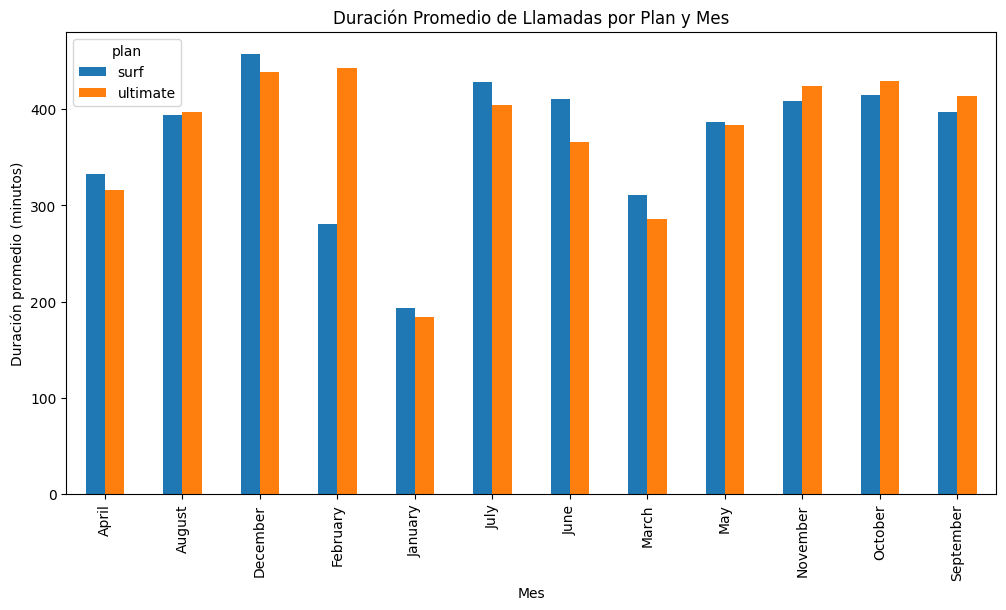

In [36]:
# Use pivot_table (pivot table) to organize the data in a format suitable for the chart
average_call_duration_pivot = average_call_duration.pivot_table(index='month', columns='plan', values='total_minutes')

# Plot a bar chart to visualize the average call duration for each plan and each month
average_call_duration_pivot.plot(
                           kind='bar', 
                           figsize=(12, 6),
                           title='Duración Promedio de Llamadas por Plan y Mes',
                           xlabel= 'Mes',
                           ylabel='Duración promedio (minutos)',
                           rot=90,
                           legend=True
                          )
# Print the chart
plt.show()

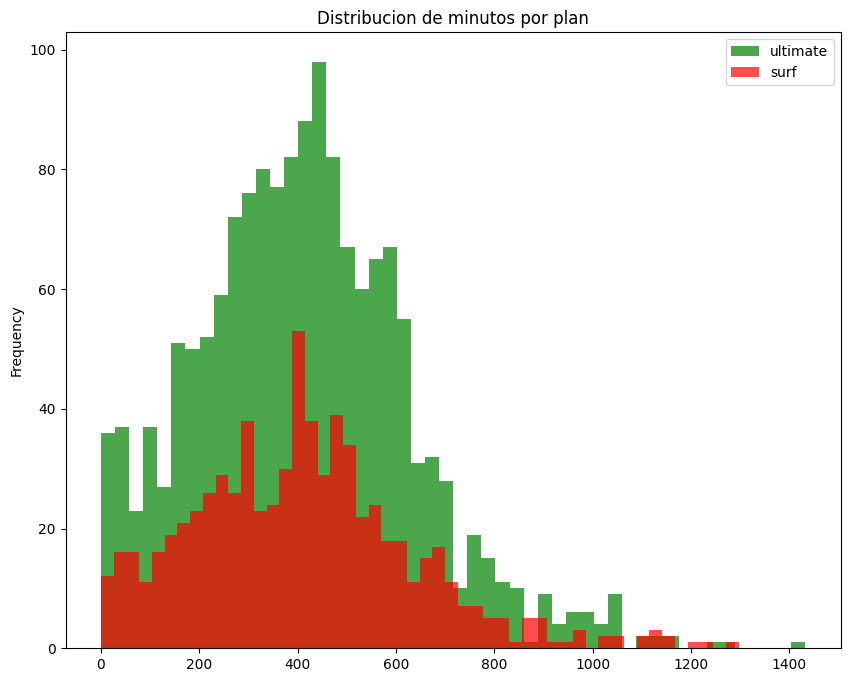

In [37]:
# Compare the monthly minutes required by users of each plan. Plot a histogram.

# Filter the data by plan
plan_ultimate = user_consumption_per_month[user_consumption_per_month['plan'] == 'ultimate']['total_minutes']
plan_surf = user_consumption_per_month[user_consumption_per_month['plan'] == 'surf']['total_minutes']

plan_surf.plot(
                           kind= 'hist', 
                           bins= 50,
                           title= 'Distribucion de minutos por plan',
                           ylabel= 'Frecuency',
                           xlabel= 'Minutos mensuales',
                           color= 'green',
                           alpha= 0.7,
                           figsize=[10,8]
                          )

plan_ultimate.plot(
                           kind= 'hist', 
                           bins= 50,
                           color= 'red',
                           alpha= 0.7
                          )

plt.legend(['ultimate','surf'])

# Print the chart
plt.show()

We calculate the mean and variance of the call duration to find out if users of different plans behave differently when making their calls.

In [38]:
# Calculate the mean and variance of the monthly call duration.

# Group by month and calculate the mean and variance of the call duration
monthly_call_duration_stats = user_consumption_per_month.groupby('month')['total_minutes'].agg(['mean', 'var'])

# Print the results
print("Media de duración mensual de llamadas:")
print(monthly_call_duration_stats['mean'])
print()
print('-----------------------------------')
print()
print("Varianza de duración mensual de llamadas:")
print(monthly_call_duration_stats['var'])

display(monthly_call_duration_stats.head())

Media de duración mensual de llamadas:
month
April        327.577465
August       395.139130
December     451.267391
February     345.800000
January      186.666667
July         420.027933
June         396.439716
March        302.257143
May          385.894231
November     413.094293
October      419.094955
September    402.050542
Name: mean, dtype: float64

-----------------------------------

Varianza de duración mensual de llamadas:
month
April        40837.904628
August       46686.644314
December     53644.954490
February     50952.028571
January      12117.466667
July         56889.678991
June         37791.190983
March        38315.078992
May          47091.318801
November     46507.622928
October      44912.729052
September    43064.924973
Name: var, dtype: float64


,mean,var
month,,
April,327.577465,40837.904628
August,395.139130,46686.644314
December,451.267391,53644.954490
February,345.800000,50952.028571
January,186.666667,12117.466667


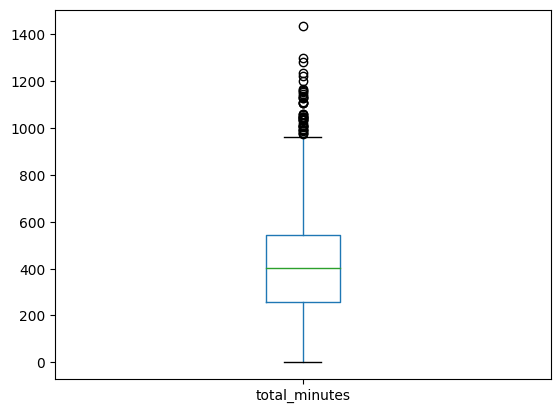

In [39]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Create the boxplot
user_consumption_per_month.boxplot(column='total_minutes',
                                  grid= False)

# Show the boxplot
plt.show()


R/ 

**1. Average Call Duration by Plan and Month**

From the bar chart of average call duration by plan and month, we observe:

**Monthly Variability**: There is variability in the average call duration from one month to another. This variability could be influenced by seasonal factors, promotions, or specific events.

**Differences Between Plans**: Comparing the 'surf' and 'ultimate' plans, we can observe differences in the average call duration. If one plan consistently shows a higher average duration, this could indicate that users of that plan tend to use more minutes.

**2. Monthly Minutes Distribution by Plan**

Through the overlapping histograms of the monthly minutes distribution by plan, we can observe:

**Distribution and Frequency**: The 'surf' and 'ultimate' plans have distinct call duration distributions. For example, if the 'ultimate' plan histogram shows a higher concentration of high values compared to the 'surf' plan, this suggests that users of the 'ultimate' plan tend to make longer calls.

**Overlapping**: The overlap of the histograms helps visually compare how call durations are distributed across each plan. Significant differences in the distributions can highlight distinct behaviors between users of the two plans.

**3. Monthly Call Duration Statistics**

From the calculated statistics (mean and variance):

**Monthly Mean**: The mean monthly call duration gives us the average duration per month. Differences in the mean between months may suggest variations in user behavior over time.

**Monthly Variance**: Variance indicates the spread of call durations. A high variance could mean that some users make calls much longer or much shorter than the average.

**4. Box Plot**

The box plot of total call duration provides a clear view of the distribution and possible outliers:

**Interquartile Range (IQR)**: Indicates the variability of call durations. A large IQR suggests that there is a large difference in call durations between users.

**Outliers**: Points outside the whiskers indicate users with atypical behaviors, such as making far more or far fewer calls than is typical for most users.

**Conclusions:**

**Variable Behavior Between Plans**: Users of the 'ultimate' and 'surf' plans appear to have different behaviors in terms of call duration. It is possible that users of the 'ultimate' plan make longer calls, which could be related to the benefits and features of that plan.

**Monthly Variability**: Call durations vary from month to month, suggesting that user behavior is not static and may be influenced by different factors throughout the year.

**Call Distribution**: The distribution of call durations shows that there are users with atypical behaviors, such as those making far more calls than others.

**Usage Preferences**: The data suggests that the plan may influence how users utilize their call minutes, possibly due to the different cost and benefit structures of each plan.
To gain more detailed conclusions, additional analyses such as statistical tests (e.g., t-test) could be conducted to confirm whether the observed differences are significant, or a correlation analysis to identify which factors might be influencing the call durations.

### Messages

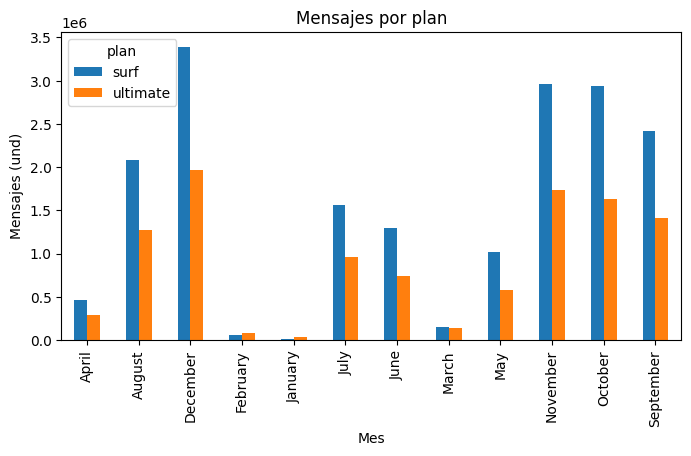

In [40]:
# Compare the number of messages users of each plan tend to send each month

# Calculate the number of messages for each plan and each month
messages_quantity_month_per_plan = user_consumption_per_month.groupby(['plan', 'month'])['message_count'].sum().reset_index()

# Use pivot_table (pivot table) to organize the data in a format suitable for the chart
messages_quantity_month_per_plan_pivot = messages_quantity_month_per_plan .pivot_table(index='month', columns='plan', values='message_count')

# Plot a bar chart to visualize the messages for each plan and each month
messages_quantity_month_per_plan_pivot.plot(
                           kind='bar', 
                           figsize=(8, 4),
                           title='Mensajes por plan',
                           xlabel= 'Mes',
                           ylabel='Mensajes (und)',
                           rot=90,
                           legend=True
                          )
# Print the chart
plt.show()

In [41]:
# Print the result
display(messages_quantity_month_per_plan.head())

,plan,month,message_count
0,surf,April,460400.0
1,surf,August,2087790.0
2,surf,December,3393808.0
3,surf,February,58507.0
4,surf,January,14112.0


In [42]:
# Compare the amount of internet traffic consumed by users by plan

# Calculate the average call duration for each plan and each month
internet_traffic_quantity_month_per_plan = user_consumption_per_month.groupby('plan')['mb_used'].sum().reset_index()

# Print the result
display(internet_traffic_quantity_month_per_plan.head())

,plan,mb_used
0,surf,26046179.93
1,ultimate,12394583.78


**Analysis of Monthly Behavior:**

**Surf Plan Users:** The number of messages sent by users of the **"surf"** plan varies significantly throughout the year. The months with the highest number of messages are December (3,393,808), November (2,964,306), and October (2,935,425). The months with the lowest number of messages are January (14,112), February (58,507), and March (147,099). A significant peak is observed in October, November, and December, which could be related to the holiday season and festivities.

**Ultimate Plan Users:** The number of messages sent by users of the **"ultimate"** plan also shows monthly variations, although not as pronounced as in the "surf" plan. The months with the highest number of messages are December (1,966,162), November (1,738,933), and October (1,631,449). The months with the lowest number of messages are January (37,951), February (79,963), and March (135,116). Similar to the **"surf"** plan, an increase in the number of messages is observed in October, November, and December, suggesting that festivities may also influence users of this plan.

**Comparison Between Plans:**

**Total Message Volume:** The **"surf"** plan has a significantly higher volume of messages compared to the **"ultimate"** plan in almost all months. This could be due to differences in the user base or the pricing and services included in each plan.

**Seasonal Behavior:** Both plans show an increase in the number of messages during the last three months of the year, suggesting that the year-end holidays similarly affect users of both plans. However, the increase is more pronounced in the **"surf"** plan, indicating that users of this plan may be more sensitive to seasonal events.

**Conclusion:**

User behavior regarding messages varies by plan. **"Surf"** plan users tend to send a higher number of messages compared to **"ultimate"** plan users. Both groups show peaks in message usage during October, November, and December, possibly due to the year-end festivities. However, the impact of these peaks is more significant in the **"surf"** plan.

Additionally, **"surf"** plan users seem to have greater monthly fluctuations in the number of messages sent, while **"ultimate"** plan users display more consistent behavior throughout the year, although with notable increases in the same months of October, November, and December.

### Internet

**Total Internet Traffic Volume:**

Users on the **"surf"** plan consume approximately double the amount of internet traffic compared to users on the **"ultimate"** plan.
This behavior could be influenced by several factors, such as differences in the user base, plan characteristics (such as data limits or internet speed), and the types of online activities performed by users of each plan.

**Behavior Based on Plan:**

**Surf Plan**: Users on the **"surf"** plan consume a significantly larger amount of data, which may indicate that this plan is designed for users with intensive internet usage.
The large amount of data consumed suggests that users of this plan are likely engaging in high-demand activities such as video streaming, large downloads, or intensive use of online applications and services.

**Ultimate Plan**: While total data consumption is lower compared to the **"surf"** plan, users on the **"ultimate"** plan still consume a considerable amount of data.
It is possible that users of this plan have a mix of moderate to heavy internet usage, but the lower total volume suggests that there may be more restrictions or a more balanced use of different online services.

**In conclusion**, users' internet traffic consumption behavior varies significantly depending on the plan. Users on the **"surf"** plan consume a considerably larger amount of data than those on the **"ultimate"** plan, suggesting different usage patterns and potentially different needs and service expectations between the two user groups.

## Income

In [43]:
# Group by plan and calculate descriptive statistics
income_stats_by_plan = user_consumption_per_month.groupby('plan')['monthly_revenue'].describe()

display(income_stats_by_plan)

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1180.0,484.067519,759.325155,20.0,97.263872,235.841523,544.358896,6310.409941
ultimate,579.0,249.936936,275.609108,70.0,86.310000,150.307119,335.470000,2198.080000


R/ 

**Number of Users (count):**

Surf: 1180 users  
Ultimate: 579 users

The number of users in the **"surf"** plan is approximately double that of the **"ultimate"** plan. This could influence the stability and variability of the statistics, as a larger number of users tends to provide more representative data that is less sensitive to outliers.

**Average Monthly Income (mean):**

Surf: 484.07  
Ultimate: 249.94

The average monthly income of the **"surf"** plan is significantly higher than that of the **"ultimate"** plan. This suggests that **"surf"** plan users generate more income on average.

**Standard Deviation (std):**

Surf: 759.33  
Ultimate: 275.61

The standard deviation of the **"surf"** plan is considerably higher than that of the **"ultimate"** plan. This indicates that there is greater variability in the income of **"surf"** plan users.

**Minimum Monthly Income (min):**

Surf: 20.0  
Ultimate: 70.0

The minimum monthly income is lower in the **"surf"** plan compared to the **"ultimate"** plan.

**Percentiles (25%, 50%, 75%):**

Surf:  
25%: 97.26  
50% (median): 235.84  
75%: 544.36  

Ultimate:  
25%: 86.31  
50% (median): 150.31  
75%: 335.47  

**Comparing the percentiles, we can observe that:** At the 25th percentile, the income of the **"surf"** plan is slightly higher than that of the **"ultimate"** plan. At the median (50th percentile), the income of the **"surf"** plan is significantly higher than that of the **"ultimate"** plan. At the 75th percentile, this difference widens even more.

**Maximum Monthly Income (max):**

Surf: 6310.41  
Ultimate: 2198.08

The maximum monthly income is much higher in the **"surf"** plan, indicating the presence of some users who generate exceptionally high incomes.

**Conclusions**

**Average Income:** The **"surf"** plan generates a significantly higher average monthly income compared to the **"ultimate"** plan. This may be because **"surf"** plan users make more intensive use of the included or additional services in the plan.

**Variability:** There is greater variability in the income of **"surf"** plan users, which could be due to a wider range of usage among these users. Some users may be generating very high incomes, which increases both the average and the standard deviation.

**Percentiles and Median:** The incomes at all analyzed percentiles (25%, 50%, 75%) are higher in the **"surf"** plan. The difference in the median suggests that the typical income of a **"surf"** user is higher than that of an **"ultimate"** user.

**High-Income Users:** The presence of much higher maximum incomes in the **"surf"** plan suggests that this plan may attract users with significantly higher consumption needs, who generate very high incomes.  
These differences could influence the company's strategic decisions, such as adjusting rates, included services, or specific marketing campaigns for each plan.

## Test the statistical hypotheses

**Formulation of Hypotheses**

**Null Hypothesis (𝐻0)**: The average income of users of the "Ultimate" and "Surf" plans is the same.

                                            𝐻0:  𝜇 Ultimate = 𝜇 Surf

**Alternative Hypothesis (𝐻𝑎)**: The average income of users of the "Ultimate" and "Surf" plans is different.

                                            𝐻𝑎:  𝜇 Ultimate ≠ 𝜇 Surf

**Choice of Statistical Test**: Since we are comparing the average incomes of two independent groups, the t-test for two independent samples is appropriate. This will allow us to determine if there is a statistically significant difference between the mean incomes of the two groups.

In [44]:
# Test the hypotheses

# Corrections according to the comments - Check for null values in the relevant columns
print("Valores nulos en 'plan':", user_consumption_per_month['plan'].isnull().sum())
print("Valores nulos en 'monthly_revenue':", user_consumption_per_month['monthly_revenue'].isnull().sum())

# Corrections according to the comments - Filter out null values for the 'plan' and 'monthly_revenue' columns
user_consumption_per_month = user_consumption_per_month.dropna(subset=['plan', 'monthly_revenue'])

# Set the Alpha value
alpha= 0.05

# Monthly revenue of users by plan
income_surf = user_consumption_per_month[user_consumption_per_month['plan'] == 'surf']['monthly_revenue']
income_ultimate = user_consumption_per_month[user_consumption_per_month['plan'] == 'ultimate']['monthly_revenue']

# t-test for independent samples
results_test = st.ttest_ind(income_surf, income_ultimate, equal_var = False)

# Print the p-value
print("valor p:",results_test.pvalue)

# Interpretation
if results_test.pvalue < alpha:
    print('rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

Valores nulos en 'plan': 0
Valores nulos en 'monthly_revenue': 544
valor p: 1.6835247406524798e-20
rechazamos la hipotesis nula


**Formulating the Hypotheses**

Null Hypothesis (H₀):

                                            𝐻0 : 𝜇𝑁𝑌 − 𝑁𝐽 = 𝜇𝑜𝑡𝑟𝑜𝑠

The average income of users from the NY-NJ area is equal to that of users from other regions.

Alternative Hypothesis (H₁):

                                            𝐻1 : 𝜇𝑁𝑌 − 𝑁𝐽 ≠ 𝜇𝑜𝑡𝑟𝑜𝑠

The average income of users from the NY-NJ area is different from that of users from other regions.

**Choosing the Statistical Test**

To compare the average incomes of two independent groups (NY-NJ vs other regions), we will use an independent t-test.

**Determining the Alpha Value**
A common significance level (α) of 0.05 is used.

In [45]:
# Test the hypotheses

# Corrections according to the comments - Check for null values in the columns we are going to analyze
print("Valores nulos en 'city':", user_consumption_per_month['city'].isnull().sum())
print("Valores nulos en 'monthly_revenue':", user_consumption_per_month['monthly_revenue'].isnull().sum())

# Corrections according to the comments - Filter out null values for the 'city' and 'monthly_revenue' columns
user_consumption_per_month = user_consumption_per_month.dropna(subset=['city', 'monthly_revenue'])

# Set the Alpha value
alpha= 0.05

# Filter by regions
region_ny_nj = "New York-Newark-Jersey City, NY-NJ-PA MSA"
income_ny_nj = user_consumption_per_month[user_consumption_per_month['city'] == region_ny_nj]['monthly_revenue']
income_otros = user_consumption_per_month[user_consumption_per_month['city'] != region_ny_nj]['monthly_revenue']

# t-test for independent samples
results_region = st.ttest_ind(income_ny_nj, income_otros, equal_var = False)

# Print the p-value
print("valor p:",results_region.pvalue)

# Interpretation
if results_region.pvalue < alpha:
    print("Rechazamos la hipótesis nula. El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para decir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")


Valores nulos en 'city': 0
Valores nulos en 'monthly_revenue': 0
valor p: 5.526541168721878e-09
Rechazamos la hipótesis nula. El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.


## General Conclusion

**Average Call Duration by Plan and Month**

**Monthly Variability**: There is significant variability in the average call duration from one month to another, which may be influenced by seasonal factors, promotions, or specific events.
**Differences Between Plans**: Users of the **'surf'** and **'ultimate'** plans show differences in the average call duration. **'Ultimate'** plan users tend to use more minutes, suggesting higher service usage.

**Monthly Minutes Distribution by Plan**

**Distribution and Frequency**: The histograms show that **'ultimate'** plan users tend to make longer calls compared to **'surf'** plan users.
**Distribution Overlap**: The overlapping histograms allow for a visual comparison of call durations between the plans, showing significant differences in user behavior.

**Monthly Call Duration Statistics**

**Monthly Mean**: The mean monthly call duration varies across months, suggesting fluctuations in user behavior throughout the year.
**Monthly Variance**: The variance in call durations indicates significant dispersion, especially in the **'surf'** plan, which may be due to greater diversity in service usage among its users.

**Box Plot of Total Call Duration**

**Interquartile Range (IQR)**: A large IQR suggests high variability in call durations among users.
**Outliers**: There are users with atypical behavior, making significantly more or fewer calls than the average.

**Monthly Messaging Behavior**

**Surf Plan Users**: They show considerable variability in the number of messages sent throughout the year, with significant peaks in October, November, and December.
**Ultimate Plan Users**: While they also show variations, these are less pronounced than in the **'surf'** plan, but still with peaks in these months.

**Comparison Between Plans in Messaging**

**Total Message Volume**: The **'surf'** plan has a higher message volume in almost all months compared to the **'ultimate'** plan.
**Seasonal Behavior**: Both plans show increases in messages during October, November, and December, with a more significant impact on the **'surf'** plan.

**Internet Traffic Consumption**

**Total Traffic Volume**: Users of the **'surf'** plan consume approximately twice the amount of internet traffic compared to **'ultimate'** plan users.
**Plan-Based Behavior**: **'Surf'** plan users seem to have more intensive internet usage, possibly engaging in data-heavy activities.

**Monthly Revenue Statistics**

**Number of Users**: The **'surf'** plan has approximately twice as many users as the **'ultimate'** plan.
**Average Revenue**: The **'surf'** plan generates a significantly higher average monthly revenue than the **'ultimate'** plan.
**Variability**: There is greater variability in the revenue of the **'surf'** plan, with some users generating very high income.
**Percentiles and Median**: In all analyzed percentiles, the revenue of the **'surf'** plan is higher than that of the **'ultimate'** plan.
**High-Income Users**: The **'surf'** plan attracts users who generate exceptionally high revenue.

**Conclusion**

The analysis shows that the **'surf'** plan generates higher average monthly revenue and has more intensive service usage, especially in terms of calls and internet traffic. However, it also shows greater variability in both revenue and service usage. The **'ultimate'** plan, while having lower usage and revenue, presents greater stability and lower variability.

These differences suggest that Megaline should consider adjusting its marketing and service strategies specifically for each plan, focusing on highlighting the features that attract users to each.